In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
short_window = 40
long_window = 100

In [8]:
data['ma40'] = data['Close'].rolling(short_window, min_periods=1).mean()
data['ma100'] = data['Close'].rolling(long_window, min_periods=1).mean()

In [9]:
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['ma40'][short_window:] > data['ma100'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

C:\Users\melap\AppData\Local\Temp\ipykernel_8508\4023403679.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['ma40'][short_window:] > data['ma100'][short_window:], 1, 0)
C:\Users\melap\AppData

In [10]:
data['Position']

Date
2010-01-04    NaN
2010-01-05    0.0
2010-01-06    0.0
2010-01-07    0.0
2010-01-08    0.0
             ... 
2022-12-23    0.0
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
Name: Position, Length: 3272, dtype: float64

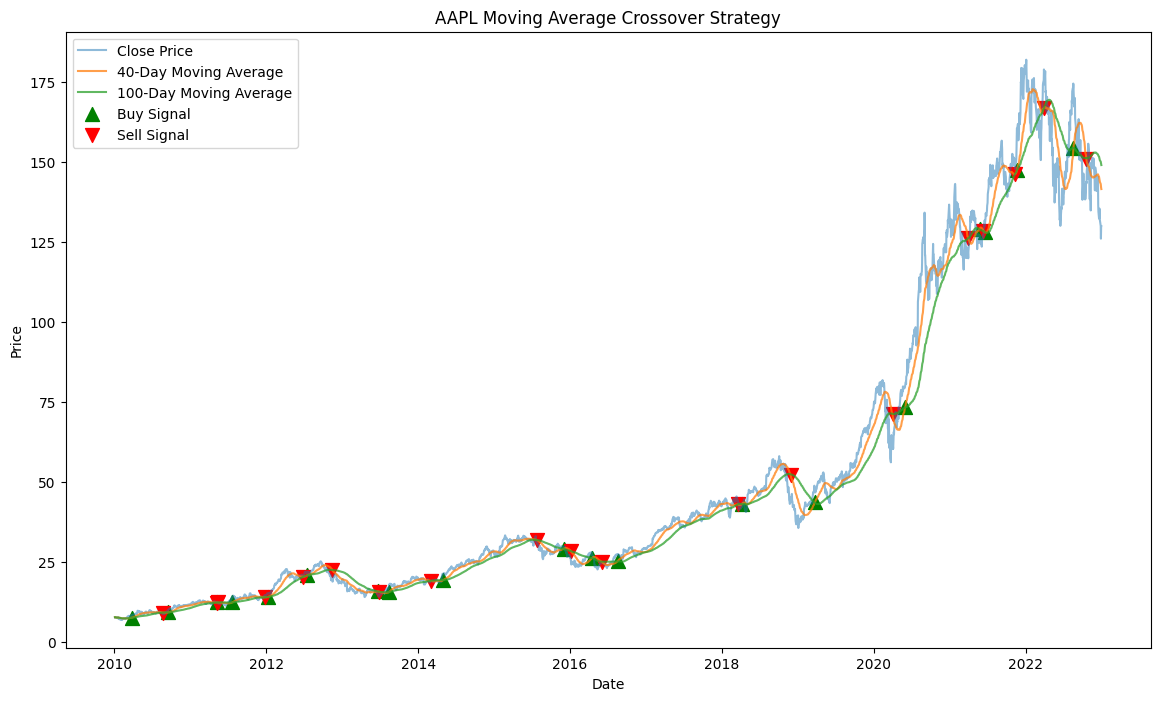

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(data['Close'], label='Close Price', alpha=0.5)
ax.plot(data['ma40'], label='40-Day Moving Average', alpha=0.75)
ax.plot(data['ma100'], label='100-Day Moving Average', alpha=0.75)

ax.scatter(data.index[data['Position'] == 1], data['ma40'][data['Position'] == 1], label='Buy Signal', marker='^', color='g', s=100)
ax.scatter(data.index[data['Position'] == -1], data['ma40'][data['Position'] == -1], label='Sell Signal', marker='v', color='r', s=100)

plt.title(f'{ticker} Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Total Strategy Return: 514.01%
Total Market Return: 1599.94%
Sharpe Ratio: 0.67


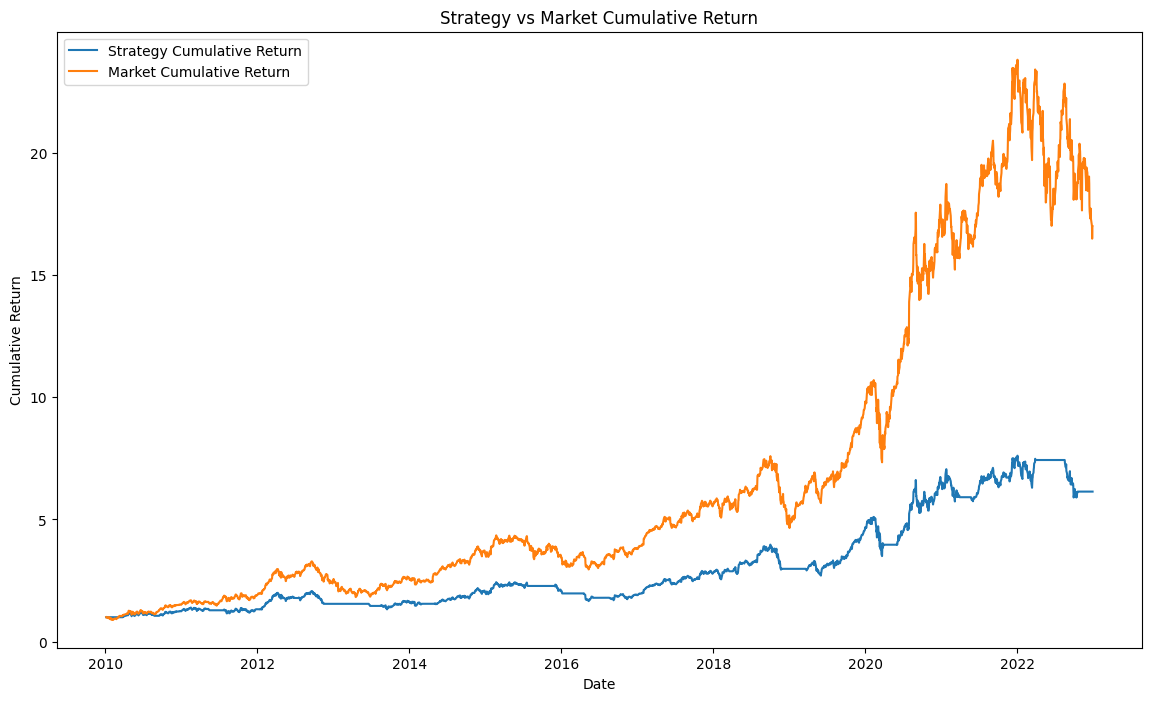

In [16]:
initial_capital = 10000

trades = pd.DataFrame(index=data.index)
trades['Price'] = data['Close']
trades['Signal'] = data['Signal']
trades['Position'] = data['Position']

trades['Returns'] = trades['Price'].pct_change()

trades['Strategy_Return'] = trades['Returns'] * trades['Signal'].shift(1)

trades['Cumulative_Return'] = (1 + trades['Strategy_Return']).cumprod()
trades['Cumulative_Market_Return'] = (1 + trades['Returns']).cumprod()

# Performace metrics
total_return = trades['Cumulative_Return'].iloc[-1] - 1
market_return = trades['Cumulative_Market_Return'].iloc[-1] - 1

# Sharpe Ratio

risk_free_rate = 0.01
strategy_return_mean = trades['Strategy_Return'].mean() * 252
strategy_return_std = trades['Strategy_Return'].std() * np.sqrt(252)
sharpe_ratio = (strategy_return_mean - risk_free_rate) / strategy_return_std

print(f'Total Strategy Return: {total_return:.2%}')
print(f'Total Market Return: {market_return:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

plt.figure(figsize=(14, 8))
plt.plot(trades['Cumulative_Return'], label='Strategy Cumulative Return')
plt.plot(trades['Cumulative_Market_Return'], label='Market Cumulative Return')
plt.title('Strategy vs Market Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()